### Imports

In [1]:
# Configuring libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics

%matplotlib inline

### Getting the data

In [2]:
# Reading the data

df = pd.read_csv('train.csv', index_col = 0)
df.head()

,day,hour,geohash,n.total,n.uber,n.bike,n.green,n.yellow,lat,long,...,state,borough,hour.num,hour.cos,hour.sin,wday.num,wday.cos,wday.sin,prec.cat,log.total
1,1,0,dr5qu,4,0,0,3,1,40.583496,-73.981934,...,New York,Kings County,0.0,1.0,0.0,0.285714,-0.222521,0.974928,"(-Inf,0]",2.386294
2,1,0,dr5qv,4,0,0,4,0,40.583496,-73.937988,...,New York,Kings County,0.0,1.0,0.0,0.285714,-0.222521,0.974928,"(-Inf,0]",2.386294
3,1,0,dr5r5,7,1,0,5,1,40.627441,-74.025879,...,New York,Kings County,0.0,1.0,0.0,0.285714,-0.222521,0.974928,"(-Inf,0]",2.945910
4,1,0,dr5r7,1,0,0,0,1,40.671387,-74.025879,...,New York,NaN,0.0,1.0,0.0,0.285714,-0.222521,0.974928,"(-Inf,0]",1.000000
5,1,0,dr5re,672,15,7,0,650,40.715332,-74.025879,...,New York,NaN,0.0,1.0,0.0,0.285714,-0.222521,0.974928,"(-Inf,0]",7.510258


### Training and testing data

In [3]:
# Preparing training and testing data

y = np.log10(df['n.total']+1)
X = df[['day', 'hour', 'lat', 'long', 'wknd', 'mean_temp', 'hour.num', 'hour.cos', 'hour.sin', 
        'wday.num', 'wday.cos', 'wday.sin', 'precip_sum']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Tuning hyperparameters via gridsearch

In [20]:
# GridSearch: defining a grid of parameters over which to optimize the lm regressor

params = [{'fit_intercept': [True, False], 'normalize': [True, False]}]
lm = LinearRegression()

gs = GridSearchCV(lm, params, cv =10, n_jobs = -1)
gs = gs.fit(X_train, y_train)

print('Best RSquared: %.3f' %gs.best_score_)
print(gs.best_params_)

Best RSquared: 0.254
{'fit_intercept': True, 'normalize': False}


In [30]:
print(gs.best_estimator_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [21]:
print('Train R-Squared: %.5f' %gs.best_score_)
print('Test R-Squared: %.5f' %gs.score(X_test, y_test))

Train R-Squared: 0.25436
Test R-Squared: 0.25239


In [23]:
lm_b = gs.best_estimator_
lm_b.fit(X_train, y_train)

print('Test R-Squared: %0.3f' %lm_b.score(X_test, y_test))

Test R-Squared: 0.252


In [25]:
predictions_b = lm_b.predict(X_test)

### Computing evaluation metrics on test data

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_b))
print('MSE:', metrics.mean_squared_error(y_test, predictions_b))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_b)))
print('RSquared', metrics.explained_variance_score(y_test, predictions_b))

MAE: 0.753678745068
MSE: 0.775516644663
RMSE: 0.880634228646
RSquared 0.252389228466


### Visualizing model performance

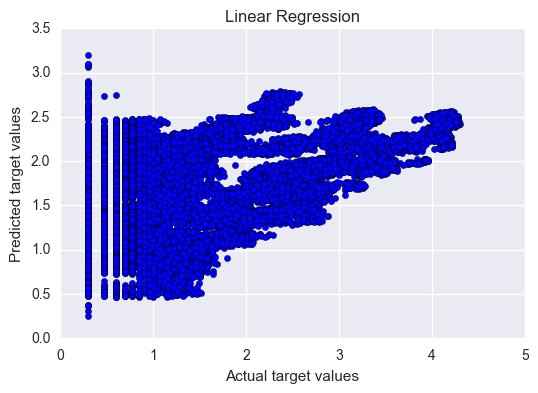

In [36]:
plt.scatter(y_test, predictions_b)
plt.title('Linear Regression')
plt.xlabel('Actual target values')
plt.ylabel('Predicted target values')
plt.savefig('lin.png')

(array([  1.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          7.00000000e+00,   9.00000000e+00,   1.00000000e+01,
          1.30000000e+01,   6.00000000e+00,   2.00000000e+01,
          3.30000000e+01,   6.90000000e+01,   1.17000000e+02,
          1.44000000e+02,   1.97000000e+02,   2.30000000e+02,
          3.16000000e+02,   3.02000000e+02,   3.69000000e+02,
          4.51000000e+02,   3.87000000e+02,   4.34000000e+02,
          5.33000000e+02,   6.42000000e+02,   8.60000000e+02,
          1.04300000e+03,   9.98000000e+02,   8.71000000e+02,
          5.97000000e+02,   3.69000000e+02,   3.04000000e+02,
          2.89000000e+02,   3.57000000e+02,   4.57000000e+02,
          5.67000000e+02,   7.20000000e+02,   7.63000000e+02,
          8.15000000e+02,   8.65000000e+02,   6.78000000e+02,
          4.08000000e+02,   4.14000000e+02,   3.22000000e+02,
          1.96000000e+02,   2.49000000e+02,   2.27000000e+02,
          2.04000000e+02,   1.75000000e+02,   1.38000000e+02,
        

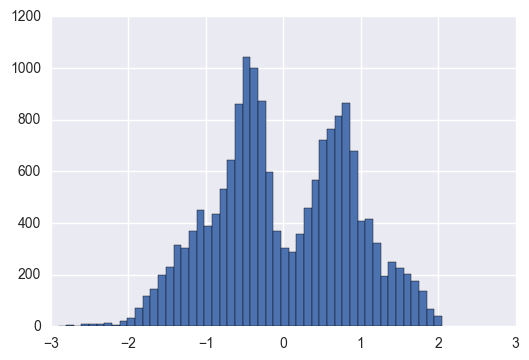

In [32]:
# Plotting a histogram of the residuals - are they normally distributed?
plt.hist((y_test-predictions_b), bins = 50)